In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random

In [2]:
# 1.1 Following PreLab05 and returning the Fundamental Matrix F and the corresponding inliers 
def feature_detection(img1, img2):
    my_SIFT_instance = cv2.SIFT_create()
    kp1, desc1 = my_SIFT_instance.detectAndCompute(img1, None) # returns list of keypoints and an array of 128xkp
    kp2, desc2 = my_SIFT_instance.detectAndCompute(img2, None) # setting mask field to None
    
    bf_matcher = cv2.BFMatcher()  # returns the best match
    matches = bf_matcher.knnMatch(desc1, desc2, k=2)  # returns the k best matches
    good_match = []
    for m, n in matches:
        if m.distance < 0.8*n.distance: # using each matches euclidean distance
            good_match.append(m)

    pl_int = np.int32([kp1[i.queryIdx].pt for i in good_match]).reshape(-1, 1, 2) # queryIdx = This attribute gives us the index of the descriptor in the list of img1 descriptors
    pr_int = np.int32([kp2[i.trainIdx].pt for i in good_match]).reshape(-1, 1, 2) # trainIdx = This attribute gives us the index of the descriptor in the list of img2 descriptors
    
    F, M = cv2.findFundamentalMat(pl_int, pr_int, cv2.FM_RANSAC)
    inlier_left = pl_int[M.ravel()==1]# ravel used to turn multidimensional arrays into linear arrays
    inlier_right = pr_int[M.ravel()==1]
    
    return F, inlier_left, inlier_right

Text(0.5, 1.0, 'Right Image')

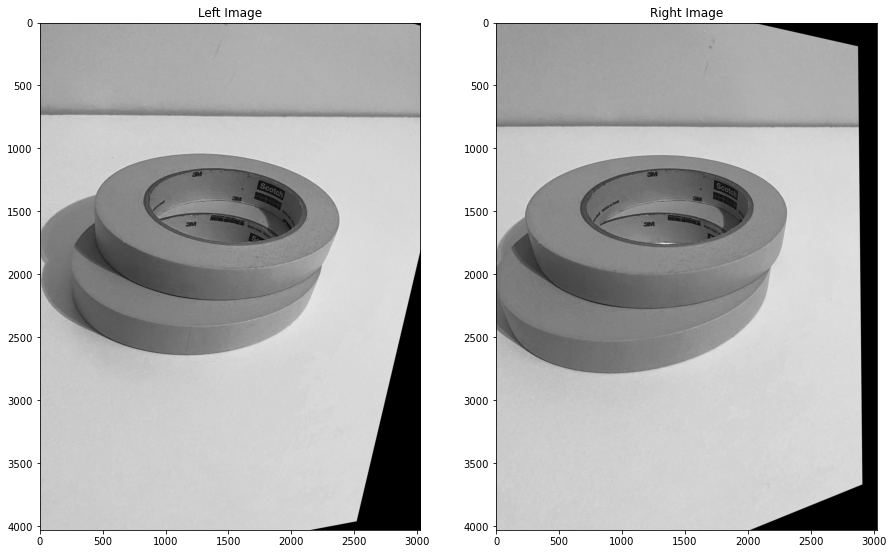

In [3]:
tape_l = cv2.imread("tape_l.jpg")
tape_r = cv2.imread("tape_r.jpg")
tl = cv2.cvtColor(tape_l, cv2.COLOR_RGB2GRAY)
tr = cv2.cvtColor(tape_r, cv2.COLOR_RGB2GRAY) 
h, w = tl.shape
h2, w2 = tr.shape

F, pl, pr = feature_detection(tl, tr)
flag, rect_mat1, rect_mat2 = cv2.stereoRectifyUncalibrated(pl, pr, F, tl.shape)

tl_rectified = cv2.warpPerspective(tl, rect_mat1, (w, h))
tr_rectified = cv2.warpPerspective(tr, rect_mat2, (w2, h2))

fig = plt.figure(figsize=(15, 10))
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(tl_rectified, cmap="gray")
plt.title("Left Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(tr_rectified, cmap="gray")
plt.title("Right Image")

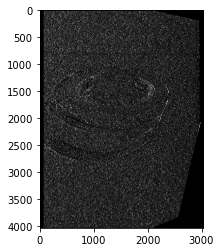

In [4]:
# did my best to troubleshoot parameter values to obtain clearest disparity map
stereo_block_match_val = cv2.StereoBM_create(numDisparities=64, blockSize=7)
disparity_map = stereo_block_match_val.compute(tl_rectified, tr_rectified)

plt.imshow(disparity_map, cmap="gray")

Text(0.5, 1.0, 'Right Image')

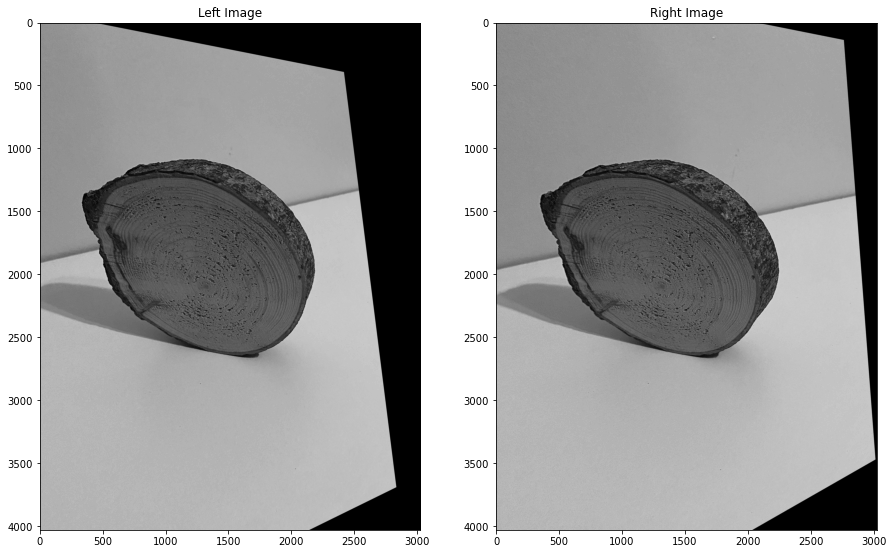

In [5]:
cl = cv2.cvtColor(cv2.imread("coaster_left.jpg"), cv2.COLOR_RGB2GRAY) 
cr = cv2.cvtColor(cv2.imread("coaster_right.jpg"), cv2.COLOR_RGB2GRAY)
h, w = cl.shape
h2, w2 = cr.shape

F, c_pl, c_pr = feature_detection(cl, cr)
flag, rect_mat1, rect_mat2, = cv2.stereoRectifyUncalibrated(np.float32(c_pl), np.float32(c_pr), F, cl.shape)

cl_rectified = cv2.warpPerspective(cl, rect_mat1, (w, h))
cr_rectified = cv2.warpPerspective(cr, rect_mat2, (w2, h2))

fig = plt.figure(figsize=(15, 10))
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(cl_rectified, cmap="gray")
plt.title("Left Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(cr_rectified, cmap="gray")
plt.title("Right Image")

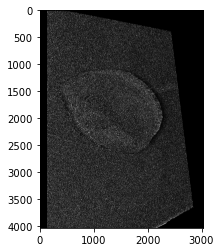

In [6]:
# did my best to troubleshoot parameter values to obtain clearest disparity map
stereo_block_match_val = cv2.StereoBM_create(numDisparities=128, blockSize=5)
disparity_map = stereo_block_match_val.compute(cl_rectified, cr_rectified)

plt.imshow(disparity_map, cmap="gray")

Text(0.5, 1.0, 'Right Image')

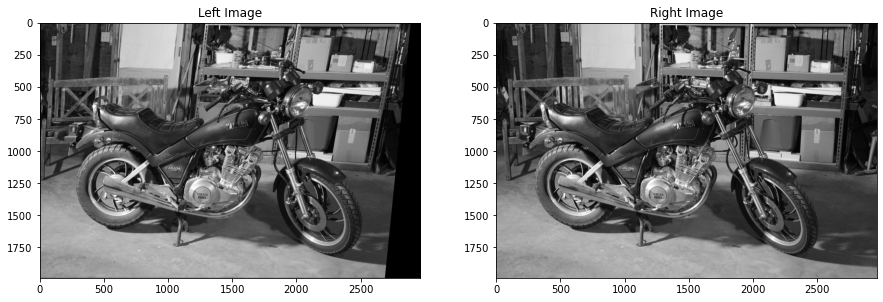

In [9]:
bl = cv2.cvtColor(cv2.imread("bike_l.png"), cv2.COLOR_RGB2GRAY) 
br = cv2.cvtColor(cv2.imread("bike_r.png"), cv2.COLOR_RGB2GRAY)
h, w = bl.shape
h2, w2 = br.shape

F, b_pl, b_pr = feature_detection(bl, br)
flag, rect_mat1, rect_mat2, = cv2.stereoRectifyUncalibrated(np.float32(b_pl), np.float32(b_pr), F, bl.shape)

bl_rectified = cv2.warpPerspective(bl, rect_mat1, (w, h))
br_rectified = cv2.warpPerspective(br, rect_mat2, (w2, h2))

fig = plt.figure(figsize=(15, 10))
rows = 1
columns = 2
fig.add_subplot(rows, columns, 1)
plt.imshow(bl_rectified, cmap="gray")
plt.title("Left Image")

fig.add_subplot(rows, columns, 2)
plt.imshow(br_rectified, cmap="gray")
plt.title("Right Image")

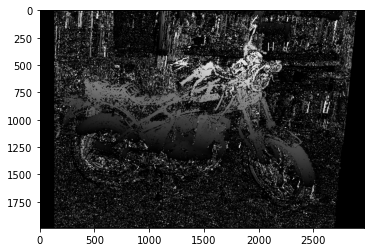

In [29]:
# did my best to troubleshoot parameter values to obtain clearest disparity map
stereo_block_match_val = cv2.StereoBM_create(numDisparities=128, blockSize=9)
disparity_map = stereo_block_match_val.compute(bl_rectified, br_rectified)

plt.imshow(disparity_map, cmap="gray")